---
title: "Pre-Processing Data"
author: Daniel Redel
date: today
format:
  html:
    toc: true
    code-fold: true
    html-math-method: katex
jupyter: python3
---

In [3]:
#| code-fold: false

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

my_colors =['#28AFB0', '#F46036', '#F1E3D3', '#2D1E2F', '#26547C', '#28AFB0']
file = "D:/Career/Data Science/Portfolios/Inside AirBnB - Netherlands/Amsterdam/"

listings = pd.read_csv(file + "listings.csv")
listings_detailed = pd.read_csv(file + "listings_detailed.csv")
calendar = pd.read_csv(file + 'calendar.csv')
reviews = pd.read_csv(file + 'reviews.csv')
reviews_detailed = pd.read_csv(file + 'reviews_detailed.csv')
neighbourhoods = pd.read_csv(file + 'neighbourhoods.csv')

## 1. Missing Values

We will start our project by dealing with potential missing values.

### `Listings` dataset

Let's inspect the `listings` dataset first:

In [42]:
#| code-fold: false

listings.shape

(6998, 18)

We have that the original dataset contains `6,998` observations and `18` variables. Let's check know the potential missing values:

In [43]:
listings.isna().sum() / len(listings) * 100

id                                  0.000000
name                                0.000000
host_id                             0.000000
host_name                           0.000000
neighbourhood_group               100.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                         9.745642
reviews_per_month                   9.745642
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
license                             0.342955
dtype: float64

Since `neighbourhood_group` has only `NA`'s and `license` does not seem to be a relevant variable, we will drop them:

In [4]:
#| code-fold: false

drop_var = ['neighbourhood_group', 'license']
listings = listings.drop(columns = drop_var)
listings.shape

(6998, 16)

What about `last_review` and `reviews_per_month`? No more than 9.7% of them are missing values. Seems reasonable to just drop those, instead of applying imputation methods:

In [5]:
#| code-fold: false

na_vars = ['last_review', 'reviews_per_month']
listings.dropna(subset=na_vars, axis=0, inplace=True)
print('Observations:', len(listings) )

Observations: 6316


This lead us to `6,316` observations.

### `calendar` dataset

We repeat the process with the `calendar` dataset:

In [6]:
print( calendar.shape )
print ( calendar.isna().sum() / len(calendar) * 100 )

(2554278, 7)
listing_id        0.000000
date              0.000000
available         0.000000
price             0.029715
adjusted_price    0.029715
minimum_nights    0.000078
maximum_nights    0.000078
dtype: float64


Since the proportion of missing values is low, let's just drop those observations:

In [7]:
#| code-fold: false

calendar.dropna(axis=0, inplace=True)
print('Observations:', len(calendar) )

Observations: 2553517


### `reviews` dataset

Same process with the `reviews` dataset:

In [49]:
print( reviews_detailed.shape )
print( reviews_detailed.isna().sum() / len(reviews_detailed) * 100 )

(339805, 6)
listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.004414
dtype: float64


In [8]:
reviews_detailed.dropna(axis=0, inplace=True)
print('Observations:', len(reviews_detailed) )

Observations: 339790


## 2. Outliers

Now we can check and remove potential outliers in our dataset. Let's start by checking our `price` variable, which will be our main outcome of interest. 

### `listings` - Price

Plotting an histogram on price already tell of something about having the existence of outliers:

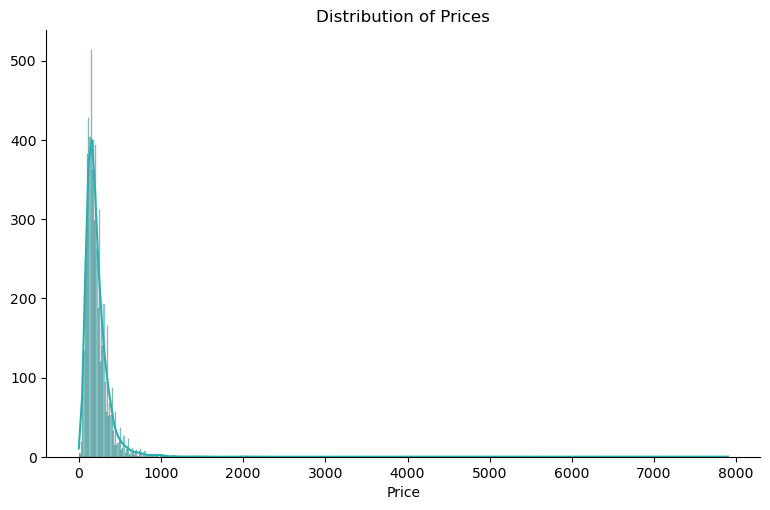

In [9]:
#| label: fig-price
#| fig-cap: Distribution of Price

import seaborn as sns
my_colors =['#28AFB0', '#F46036', '#F1E3D3', '#2D1E2F', '#26547C']

# Set up Figure
#fig, ax = plt.subplots(figsize=(8,4))

# Hist + KDE
sns.displot(data=listings, x="price", kde=True, color=my_colors[0], aspect=8/5)

# Labels
plt.xlabel('Price')
plt.ylabel('')
plt.title('Distribution of Prices')

# Show the Plot
plt.show()

@fig-price reveals a pronounced tail towards the higher end, indicating the presence of outliers—entries with significantly higher prices compared to the majority of listings. These outliers can skew statistical analysis and machine learning models, potentially leading to inaccurate predictions. Employing the **Interquartile Range (IQR)** approach is a robust method for detecting and managing outliers. 

By calculating the IQR, which represents the range between the 25th and 75th percentiles of the data distribution, we can identify values that fall beyond a certain multiple of the IQR from the quartiles. Let's identify the outliers by calculating the IQR:

In [10]:
#| code-fold: false

# calculate IQR for column Height
Q1 = listings['price'].quantile(0.25)
Q3 = listings['price'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
thres = 1.5
outliers = listings[(listings['price'] < Q1 - thres * IQR) | (listings['price'] > Q3 + thres * IQR)]

# drop rows containing outliers
listings = listings.drop(outliers.index)

With this we can plot again our histogram without the outliers:

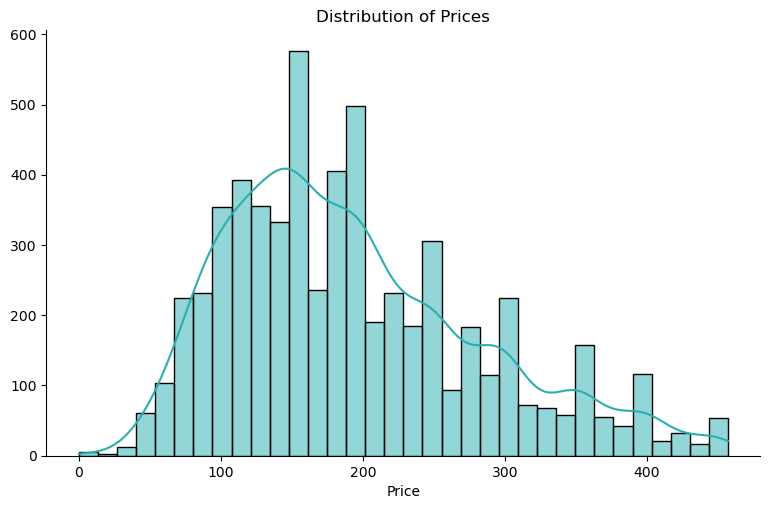

(6018, 16)


In [8]:
#| label: fig-price-iqr
#| fig-cap: Distribution of Price (No Outliers)

import seaborn as sns
my_colors =['#28AFB0', '#F46036', '#F1E3D3', '#2D1E2F', '#26547C']

# Set up Figure
#fig, ax = plt.subplots(figsize=(8,4))

# Hist + KDE
sns.displot(data=listings, x="price", kde=True, color=my_colors[0], aspect=8/5)

# Labels
plt.xlabel('Price')
plt.ylabel('')
plt.title('Distribution of Prices')

# Show the Plot
plt.show()
print(listings.shape)

The histogram in @fig-price-iqr now exhibits a more symmetrical and bell-shaped distribution. This indicates a more normalized spread of prices, suggesting that extreme outliers have been successfully mitigated. 

Notably, with outliers removed, the average price per night for Airbnb listings in Amsterdam is approximately `190` euros.

## Data Export

We'll export this finalized dataset. Going forward, all our analyses will rely on this processed dataset, which has undergone outlier removal using the IQR method.

In [10]:
#| code-fold: false

listings.to_csv('listings_processed.csv', index=False)
calendar.to_csv('calendar_processed.csv', index=False)
# reviews_detailed.to_csv('reviews_processed.csv', index=False)